In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np

Text(0.5, 0, 'Population in $10,000s')

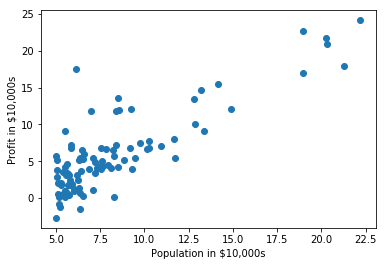

In [2]:
#Load and plot data
data = np.loadtxt("ex1data1.txt", delimiter = ",")
plt.scatter(data[:,0], data[:,1])
plt.ylabel("Profit in $10,000s")
plt.xlabel("Population in $10,000s")

In [3]:
#Vectorizing data

#Strip x and y from data and make them into numpy column vectors
#The -1 in the argument of reshape allows inferencing
x = np.array(data[:,0])
x_column = x.reshape(-1,1)
y = np.array(data[:,1])
Y = y.reshape(-1,1)

#Creating a column of ones to conacatenate with x_xolumn in order to accomodate theta_0 paramter in matrix calculations
ones = np.ones((len(x),1), dtype=float)

#Initializing parameter matrix
theta = np.zeros((2,1), dtype=float)

#Making full feature matrix
X = np.append(ones,x_column,axis=1)

In [4]:
#Initializing hyperparamters
iterations = 1500
alpha = .1

In [6]:
#Calculating cost
n = len(x)
def cost(X,Y,theta):
    J = (sum((np.dot(X,theta)-Y)**2))/(2*n)
    return J

#Here theta is initialized to zeros
print(cost(X,Y,theta))

[32.07273388]


In [7]:
#Calculating gradient
def grad(X,Y,theta):
    gradient = X.T.dot((np.dot(X,theta)-Y)**2)
    return gradient

In [8]:
#Gradient descent
def grad_descent(X,Y,theta,alpha,iterations):
    for i in range(iterations):
        theta = theta - (alpha/n)*grad(X,Y,theta)
        print(cost(X,Y,theta))
    return theta

grad_descent(X,Y,theta,alpha,iterations)

[338832.91625797]
[3.0021847e+13]
[2.34631347e+29]
[1.43310161e+61]
[5.3463682e+124]
[7.44085132e+251]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[in

/Users/gerardosalazar/ML_PATH/env/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in square
  after removing the cwd from sys.path.
/Users/gerardosalazar/ML_PATH/env/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in square
  This is separate from the ipykernel package so we can avoid doing imports until



[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[in

array([[-inf],
       [-inf]])